# Linear Regression Template Code - 10/3/2022

Hello everyone! This is the template code that we are going to cover/do self paced from today's Tinovation meeting (10/3/2022).
We're going to be covering linear regression (detailed during the slides), and more specifically going to be using different data visualization - a new topic - to understand trends within the data.

After data visualization, we'll be using processing the data and then performing linear regression using a package known as scikit-learn.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Handling the Data
To handle the data, make sure you download the "train.csv" file and put it into the same folder as this file.

After getting the .csv file downloaded and set up as described above, we have to load that aforementioned .csv file into a Pandas Dataframe, and plainly visualize the data to make sure that we've properly loaded the data.

To do this, you will need to find the filepath of the .csv file! There are a number of ways to do this, but we've listed apt documentation for one method - this will require a little bit of problem solving.

<br>

Helpful commands:
<pre>
    os.getcwd() # --> returns the current directory as a STRING
    os.listdir(given_path) # --> returns all directories in the given path(as a STRING) as a list
    pandas.read_csv(filepath) # --> returns the csv file(file path is a STRING) as a pandas DataFrame
</pre>
If you want to read more about each, refer to following:<br>
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html <br>

Hint for finding the file path:<br>
 - Maybe try looking for a certain file within a list of filenames from your current directory...do you understand why we gave you those first two commands now? ;) <br> 
   - You might have to google how to search for a certain element in a list to do the approach described above. Don't be afraid to ask for help!

In [11]:
#ENTER CODE HERE (approx. 2 lines)    
#database = ...
#database_file = ...
database_file = [file for file in os.listdir(os.getcwd()) if file == 'train.csv'][0]
database = pd.read_csv(database_file)


In [13]:
#Quick tests - you'll find these scattered throughout the whole code base 
assert 'database_file' in globals(), "Didn't download the file and(or) run the code :("
assert 'database' in globals(), "Didn't initialize the database variable very sadge"


print(database.head()) # prints the first 10 rows of the dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Now that you've successfully initialized the database and printed out the first 10 rows of the dataset, let's look at how the data seems to be oriented.

We can tell from this snippet of data that there seems to be several columns of data here...but I think we can get rid of a few. There's no need to have all of these columns.
<br>
Which do you think are the most important - given that we're trying to find what age had the highest chance of survival?
<br><br>
If you said <strong>age and survival</strong>, you're correct.
<br>
However, there is something that I should probably warn you about. Take a look at the following column of data: 
<pre>
Age
    27.0
    NaN
    13.0
    NaN
    9.0
</pre>
<br> What does that "NaN" thing mean? 
- Great question! It means not a number, and usually happens when a data value is considered missing or null.
    - If you can't see where I'm going with this...we don't want null and missing values for certain categories.
    - We need to find a way to get rid of those rows with NaN values, so that every row in the dataset is defined.

I think it would be best to try and get rid of all the other categories.<br><br>

Helpful Commands:
<pre>
    dataset.loc[selected_rows, selected_columns] # --> returns the specified rows of the specified columns
                                                       (as a list of the names of the rows/columns)
                                                     
    dataset.dropna(axis) #--> removes all the NaN(not a number) entries in the table - axis=0 means rows, axis=1 means columns
</pre>
If you want to read more about .loc(), look at the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
<br><br>
Hint: We want to get all rows, but only two columns...we face two problems here.
- We aren't going to type in every single row in a list and pass that as a parameter, we could be here for hours. Instead, use something called the slice operator, indicated with a colon in Python -->  " : ".
    - You might have to do some research to know how to use the slice operator to get all values. 
    - Stack Overflow to the Rescue!! https://stackoverflow.com/questions/4012340/colon-in-python-list-index

In [46]:
#ENTER CODE HERE (approx. 2 lines)
#train = ...
train = database.loc[:, ["Age", "Survived"]]
train = train.dropna(axis=0)
print(train.shape)

(714, 2)


In [47]:
assert 'train' in globals(), "Didn't run the code or changed the variable name :("
assert train.shape == (714, 2), f"Shape of the new dataset should be (714, 2), but is {new_dataset.shape}"

print(train)

      Age  Survived
0    22.0         0
1    38.0         1
2    26.0         1
3    35.0         1
4    35.0         0
..    ...       ...
885  39.0         0
886  27.0         0
887  19.0         1
889  26.0         1
890  32.0         0

[714 rows x 2 columns]


Now that we've gotten the data we want, let's briefly cover a part of handling data...visualization!<br>
We'll be using a package known as seaborn to handle visualization of the data. We'll get into this more later on! Just use it as a tool to make the numbers easier to understand. <br>No need to write the code for this part, since we haven't covered it yet.

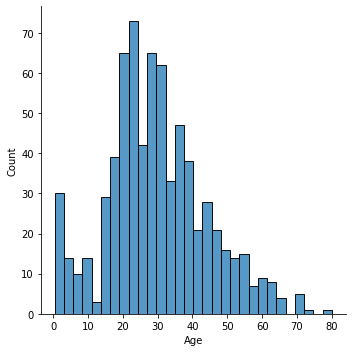

In [54]:
sns.displot(train["Age"], kde=False, bins = 30)

While data this simple doesn't really lend itself for much analysis, we'll get into much more complex datasets and do more with the datasets as we progress. For now, let's just make this simple connection. We know from the plot above the ages seem to be mainly from 15 to 40.

<AxesSubplot:xlabel='Survived', ylabel='count'>

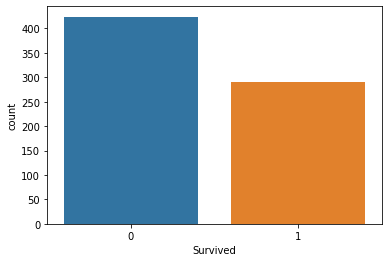

In [56]:
sns.countplot(x="Survived", data=train)

The data above is also not very telling of any major trend, but I guess what we can pull from this is that more people died than lived...make of that what you will.
<br>
<br>
Anyway, we're now ready to use linear regression and find this line of best fit!<br><br>
We're going to use something called scikit-learn, an expansive open source data science package that is widely used to handle data and for regression - which is exactly what we're doing in this code sample.

Specifically, we need to do the following steps:
- We need to first split our data into X and Y datasets (think about which is which - always ask us if you're stuck.)
- Then we need to split that X and Y data into train and test sets - use the same thing you did get only two columns into a dataset, but this time only use 1 column in that list!
    - You may be wondering why that's even needed. This is because the regression model trains on the allocated train data we have, but in order to test how effective the regression is at fitting to the data, we need a fresh batch of data from the same distribution to ensure that it's not testing on data that it has already seen before in the train data. If it's training on data that it's already seen before, then we're obviously not going to be able to accurately measure prediction.
- After that, all we have to do is fit the training data onto a linear regression model. We do that part of the code for you.


Helpful Commands from Scikit Learn:
<pre>
    train_test_split(X, y, test_size) #--> returns X_train, X_test, y_train, y_test w test_size being a ratio from 0 to 1 
    model_name_goes_here.predict(X_test) #--> returns predictions of the data from the entered test data
</pre>
Hints:
- We will provide the imports for you, and will fill in code in between.
- Also, the test size ratio gets smaller the more total data you have - since we have a relatively small amount of data,<br>
  we recommend a test size ratio of 0.2 -> 0.3, but feel free to experiment!

In [89]:
#ENTER CODE HERE (approx 2 lines)
#X = ...
#y = ...

In [90]:
!pip install sklearn 
#MAKE SURE YOU HAVE SCIKIT LEARN INSTALLED!!!!

from sklearn.model_selection import train_test_split
#ENTER CODE HERE (approx. 1 line)
#X_train, X_test, y_train, y_test = ...

In [91]:
assert 'X_train' in globals(), "Didn't run code or changed variable names"
assert 'y_train' in globals(), "Didn't run code or changed variable names"
assert 'X_test' in globals(), "Didn't run code or changed variable names"
assert 'y_test' in globals(), "Didn't run code or changed variable names"

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#ENTER CODE HERE (approx. 1 line)
#predictions = ...

LinearRegression()

In [100]:
assert 'predictions' in globals(), "Didn't run code or changed variable names"

Now, is the last part. How effective was our linear regression? We can't calculate the accuracy of a regression model (come ask us why if you're curious), but we can graphically see how well our line of best fit is for the data we have. Look below...

In [142]:
X_test = X_test.reshape(X_test.shape[1]*X_test.shape[0], 1)

predictions = np.array(predictions).reshape(predictions.shape[1]*predictions.shape[0], 1)
print(predictions.shape)

(143, 1)


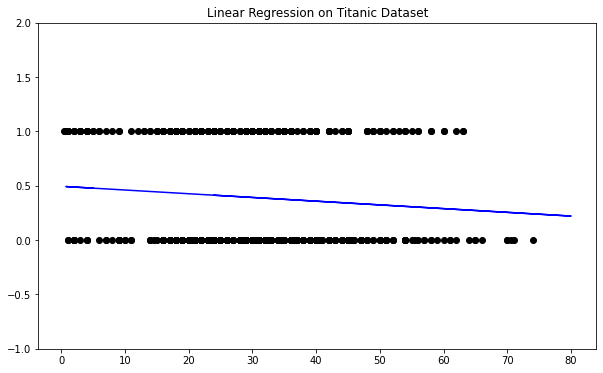

In [146]:
fig, ax = plt.subplots(figsize=[10,6])
ax.set_title("Linear Regression on Titanic Dataset")
ax.set_ylim(-1, 2)
ax.scatter(X_train, y_train, color="black")
ax.plot(X_test, predictions, color="blue")

plt.show()

Does this look like it really fits the data? No should be the answer. This is an example of when a certain regression model doesn't fit the data at hand. Do you know why linear regression isn't good for this scenario? <br><br>

If you didn't pick up on it, if the y output is always going to be 0 or 1, then what linear relationship is the data going to really have? It's a classic example of binary classification(0 or 1), and that's something we will definitely cover later on using this dataset. How can a linear relationship be made out of a 0 or a 1?

<br>However, if you would like to see a sample of linear regression code that does work, look for the file "linreg.ipynb" in the code samples. It shows you sample data that makes sense with the linear regression model, and clarifies a use case of it.

<br>Thank you for running through this code sample! If you have any questions, ask now or send a msg in our discord. (refer to the slides to find it.)

<br> <strong>HAVE A GREAT MONDAY!</strong> <br>